In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from math import pi
import sys

In [2]:
#load the data
data = pd.read_csv("./ws-data-pandas-main/data/DataSample.csv")
data

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22021,5614888,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AEF3-DF0B

 Directory of C:\Users\tejas\Desktop\Rushi

23-05-2021  12:53    <DIR>          .
23-05-2021  12:53    <DIR>          ..
18-05-2021  12:41    <DIR>          .ipynb_checkpoints
23-05-2021  12:35               797 Bonus.txt
23-05-2021  12:53            28,705 Rushi Bhuva_work sample.ipynb
08-03-2021  19:38    <DIR>          ws-data-pandas-main
18-05-2021  13:20           338,403 ws-data-pandas-main.zip
               3 File(s)        367,905 bytes
               4 Dir(s)   5,845,770,240 bytes free


# 1.) Clean the data

Here, identical data is removed on the basis of **geoinfo**, and **TimeSt** and I consider *Latitude*, *Longitude* in **geoinfo** because latitude and longitude are different for each loaction and if consider city, country, or Province then there might be chances that I lost too much unique data.

In [4]:
#clean the data by removing some identical entries based on geoinfo and time stamp
clean_Data = data.drop_duplicates(subset=['Latitude', 'Longitude', ' TimeSt'])
clean_Data

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


# 2.) Labeling the data

In [5]:
#load the list of Point of Interest (POI)
POI = pd.read_csv("./ws-data-pandas-main/data/POIList.csv")
POI

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


Here, I found the issue that POI1 and POI2 has same latitude and longitude entry so in further operations POI1 and POI2 will be consider as POI1.

In [6]:
# Refference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html
poidict = POI.set_index('POIID').T.to_dict('list')
#poidict

In [7]:
poi_id = POI.drop(columns = ['POIID'])
lat_long = poi_id.to_records(index=False)
dest = list(lat_long)
#dest

In [8]:
#This function is used to measure the distance between two geological locations
# Refference: https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4


def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [9]:
#This function is made to find the shortest distance from the given POI cooridnates 
#so that I can assign label to each instances.
def min_find(source, destination):
    minimum = sys.maxsize
    region = ""
    for x in poidict:
        dist = haversine_distance(source[0], source[1], poidict[x][0], poidict[x][1])
        if dist < minimum:
            minimum = dist
            region = x
            
    return minimum, region

In [10]:
#This loop will measure the distance from each POI and then assign the POI to intances based on nearest distacne.
poi_group = []
distance_list = []
for index, record in clean_Data.iterrows():
    (distance, region) = min_find((record.loc['Latitude'], record.loc['Longitude']), dest)
    poi_group.append(region)
    distance_list.append(distance)

clean_Data["POI_Group"] = poi_group
clean_Data["Distance"] = distance_list

C:\Users\tejas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tejas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
clean_Data.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,POI_Group,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3,593.41
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3,677.31
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3,569.65
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3,634.73
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3,634.73


# 3.) Analysis

In [12]:
# clean data with assigned POI Groups
clean_Data_poiid = clean_Data
clean_Data_poiid

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,POI_Group,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3,593.41
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3,677.31
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3,569.65
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3,634.73
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3,634.73
...,...,...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621,POI1,283.94
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,POI3,522.02
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,POI3,462.00
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,POI3,536.87


### 1.) Average and Standard Deviation

For finding average and standard deviation for each instances from their assigned POI, following code are used which sepearte out the POI1, POI3 and POI4 and after sepearting them their average and standard deviation are caluclated using numpy's function of average and standard deviation.

In [13]:
region_distances ={}

for region in poidict.keys():
# Filter and extract distance for each region
  distance_array = clean_Data_poiid[clean_Data_poiid["POI_Group"] == region]["Distance"].values
    
  if len(distance_array) > 0:
      region_distances[region] = distance_array

# Calculate Mean and Standard Deviation
      distance_mean = np.mean(distance_array)
      distance_std = np.std(distance_array)

# Print Mean and Standard Deviation
      print("Mean for", region,"is:", distance_mean)
      print("Standard Deviation for", region,"is:", distance_std)

Mean for POI1 is: 301.9065199958877
Standard Deviation for POI1 is: 412.40876596734125
Mean for POI3 is: 451.52746401225113
Standard Deviation for POI3 is: 223.33928994162446
Mean for POI4 is: 497.27834381551367
Standard Deviation for POI4 is: 1471.392785348516


### 2.) Density and Radius

Here in this problem the task was assigned is to draw a circle for each POI in such a way that it includes all the points in it.
 - So, to plot all the data points scatter plot is used.
 - Now, to draw a circle I used POI's coordinates as a center and for radius I used the list made in previous question because it contains distaces of each cooridinate from the POI assigned to it. And I consider the farest point from the POI as a radius.
 - And to scale down the dimensoin of cirlce I divide the radius with some nummber in such a way that it looks appropriately on the figure.

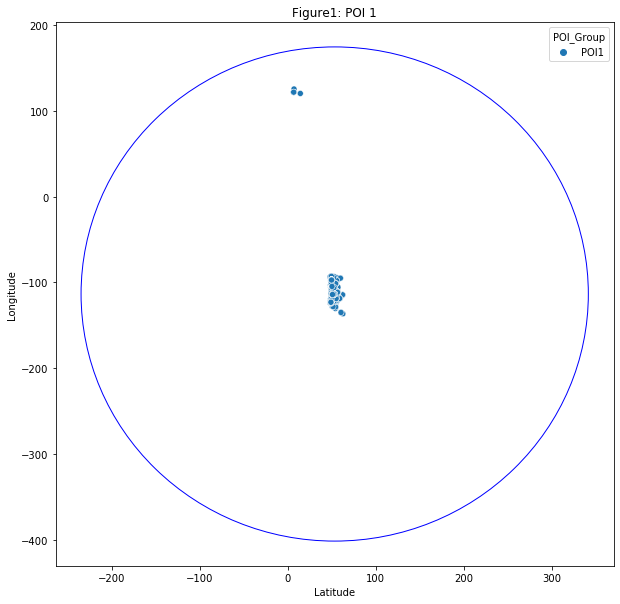

In [14]:
plt.figure(figsize=(10,10))

circle=plt.Circle((poidict['POI1'][0], poidict['POI1'][1]), max(region_distances['POI1'])/40, edgecolor='blue', fill = False)
plt.gca().add_patch(circle)

#region1_data = clean_Data_poiid[clean_Data_poiid['POI_Group'] == 'POI1']
sns.scatterplot(data=clean_Data_poiid[clean_Data_poiid['POI_Group'] == 'POI1'], x='Latitude', y='Longitude', hue='POI_Group')
plt.title('Figure1: POI 1')
plt.Circle((0, 30), 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [15]:
radius_poi1 = max(region_distances['POI1'])
print ("Radius of POI1 is:",radius_poi1)

Radius of POI1 is: 11531.82


In [16]:
area_1 = pi * radius_poi1 * radius_poi1

density_poi1 = (len(region_distances['POI1'])/area_1)
print ("Density for POI1 is:",density_poi1)

Density for POI1 is: 2.328269952674565e-05


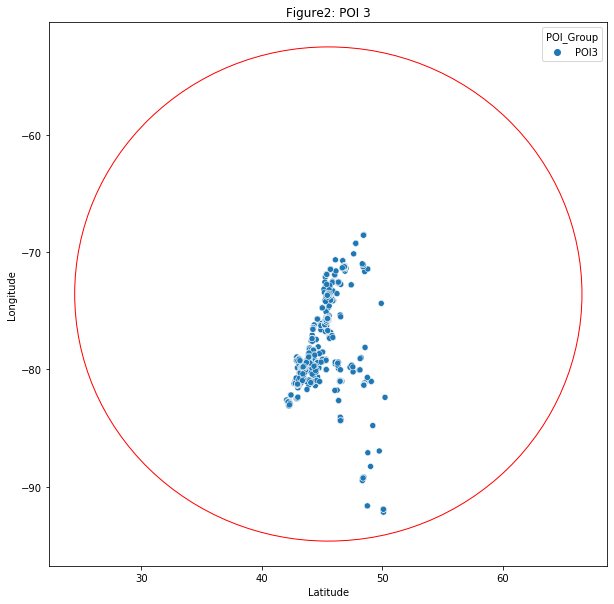

In [17]:
plt.figure(figsize=(10,10))

circle=plt.Circle((poidict['POI3'][0], poidict['POI3'][1]), max(region_distances['POI3'])/70, edgecolor='red', fill = False)
plt.gca().add_patch(circle)

sns.scatterplot(data=clean_Data_poiid[clean_Data_poiid['POI_Group'] == 'POI3'], x='Latitude', y='Longitude', hue='POI_Group')
plt.title('Figure2: POI 3')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [18]:
radius_poi3 = max(region_distances['POI3'])
print ("Radius for POI3 is:",radius_poi3)

Radius for POI3 is: 1474.58


In [19]:
area_3 = pi * radius_poi3 * radius_poi3

density_poi3 = (len(region_distances['POI3'])/area_3)
print ("Density for POI3 is:",density_poi3)

Density for POI3 is: 0.0014338967792428933


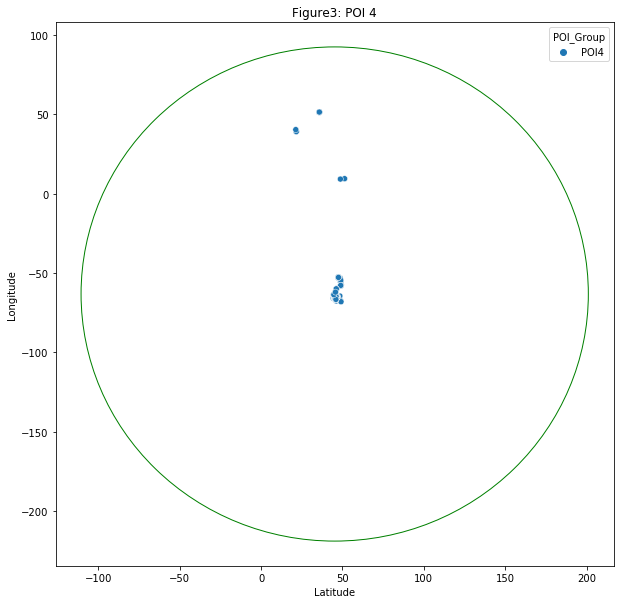

In [20]:
plt.figure(figsize=(10,10))

circle=plt.Circle((poidict['POI4'][0], poidict['POI4'][1]), max(region_distances['POI4'])/60, edgecolor='green', fill = False)
plt.gca().add_patch(circle)

sns.scatterplot(data=clean_Data_poiid[clean_Data_poiid['POI_Group'] == 'POI4'], x='Latitude', y='Longitude', hue='POI_Group')
plt.title('Figure3: POI 4')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [21]:
radius_poi4 = max(region_distances['POI4'])
print ("Radius POI4 is:",radius_poi4)

Radius POI4 is: 9349.57


In [22]:
area_4 = pi * radius_poi4 * radius_poi4

density_poi4 = (len(region_distances['POI4'])/area_4)
print ("Density POI4 is:",density_poi4)

Density POI4 is: 1.736941658456156e-06


For mapping POIs in a range of -10 to 10 Min-max scaler is used and its mathematical model is as follow:


$ X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$

scikit-learn library has inbuilt min max scaler functoin. So, I used that function and it has also provides the range selection parameter, therfore I give range of -10 to 10 in that.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
min_max_scaler = MinMaxScaler(feature_range = (-10, 10))
df = min_max_scaler.fit_transform(clean_Data_poiid[["Latitude", "Longitude"]])
#df

In [25]:
df_name = pd.DataFrame(np.c_[df, clean_Data_poiid['POI_Group'].values], columns=["latitude","longitude","POI"])
#df_name

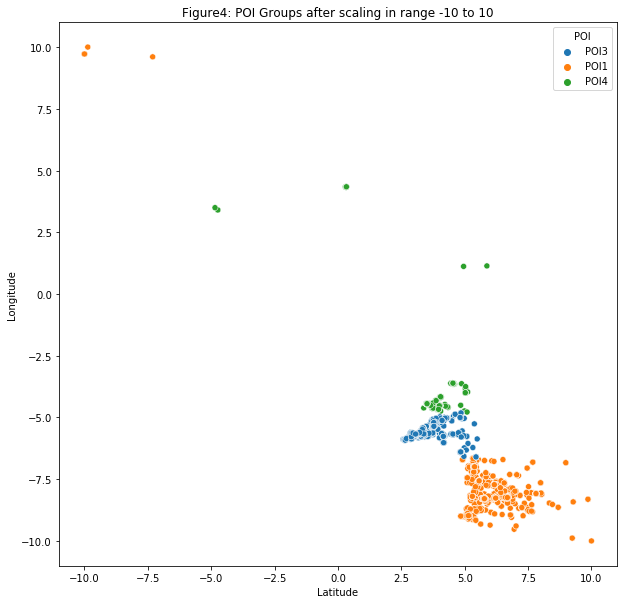

In [26]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=df_name, x='latitude', y='longitude', hue='POI')
plt.title('Figure4: POI Groups after scaling in range -10 to 10')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()